In [98]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

path = "../../data/features_30_sec.csv"
data = pd.read_csv(path)

data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [99]:
# Remove file names and labels
data = data.iloc[0:, 1:]
y = data["label"]
X = data.loc[:, data.columns != "label"]

from sklearn import preprocessing
from sklearn.decomposition import PCA

scalers = {
    'MinMaxScaler': preprocessing.MinMaxScaler(),
    'StandardScaler': preprocessing.StandardScaler(),
    'MaxAbsScaler': preprocessing.MaxAbsScaler(),
    'RobustScaler': preprocessing.RobustScaler(),
    'Normalizer': preprocessing.Normalizer()
}

cols = X.columns

test = X.copy()
print("Normalization Methods")
for name, scaler in scalers.items():

    # Standardization (z-scoring)
    np_scaled = scaler.fit_transform(test)
    test = pd.DataFrame(np_scaled, columns = cols)

    # Get 2 Principal Components
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(test)
    
    print(name + " " + str(pca.explained_variance_ratio_))

Normalization Methods
MinMaxScaler [0.2439355  0.21781804]
StandardScaler [0.23568344 0.1665449 ]
MaxAbsScaler [0.28024235 0.23935276]
RobustScaler [0.76571133 0.11254727]
Normalizer [0.18325485 0.15149618]


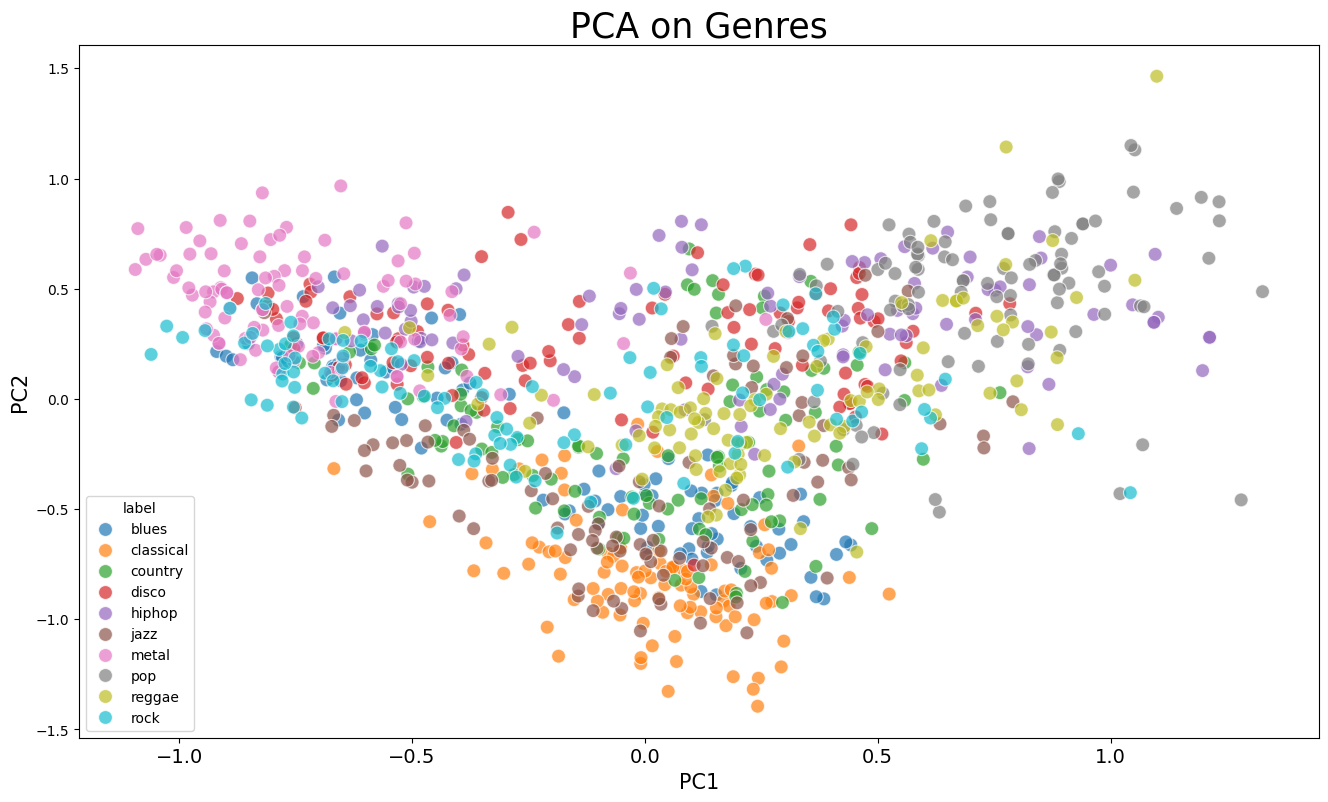

In [100]:
# Standardization (z-scoring)
np_scaled = preprocessing.MinMaxScaler().fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Get 2 Principal Components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC2", data = finalDf, hue = "label", alpha = 0.7, s = 100);
plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")